In [1]:
!pip install fastai


In [0]:
import pandas as pd
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving mask_labels.udt.csv to mask_labels.udt.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['mask_labels.udt.csv']))

In [0]:
df = df[df.path.str.contains("samples")]

In [6]:
url_list = [str(a) for a in list(df["imageUrl"])]
open("./images.txt", "w").write("\n".join(url_list))

316721

In [7]:
download_images("./images.txt", "./images", max_pics = 10000)

In [0]:
labels = pd.DataFrame(data={
    "image": (df.index - 1).astype("str").str.zfill(8) + ".jpg",
    "output": df["output"]
})

In [9]:
failed = verify_images("./images", delete=True)

cannot identify image file <_io.BufferedReader name='images/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000255.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000549.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000405.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000305.jpg'>
cannot identify image file <_io.BufferedReader name='images/00001448.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000475.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000068.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000411.jpg'>
cannot identify image file <_io.BufferedReader name='images/00000541.jpg'>
cannot identify image file <_io.BufferedReader name='images/00001383.jpg'>
cannot identify image fil

In [0]:
missing_images = list([img for img in labels["image"] if not(Path("./images") / img).exists()])

In [0]:
labels = labels[~labels["image"].isin(missing_images)]

In [0]:
labels.loc[labels["output"] == "not_medical_mask", "output"] = "mask"
labels.loc[labels["output"] == "medical_mask", "output"] = "mask"

In [0]:
data = ImageDataBunch.from_df(".", labels, folder="images", seed=42,
                              label_col="output", bs=16, size=224,
                              ds_tfms=get_transforms()).normalize(imagenet_stats)

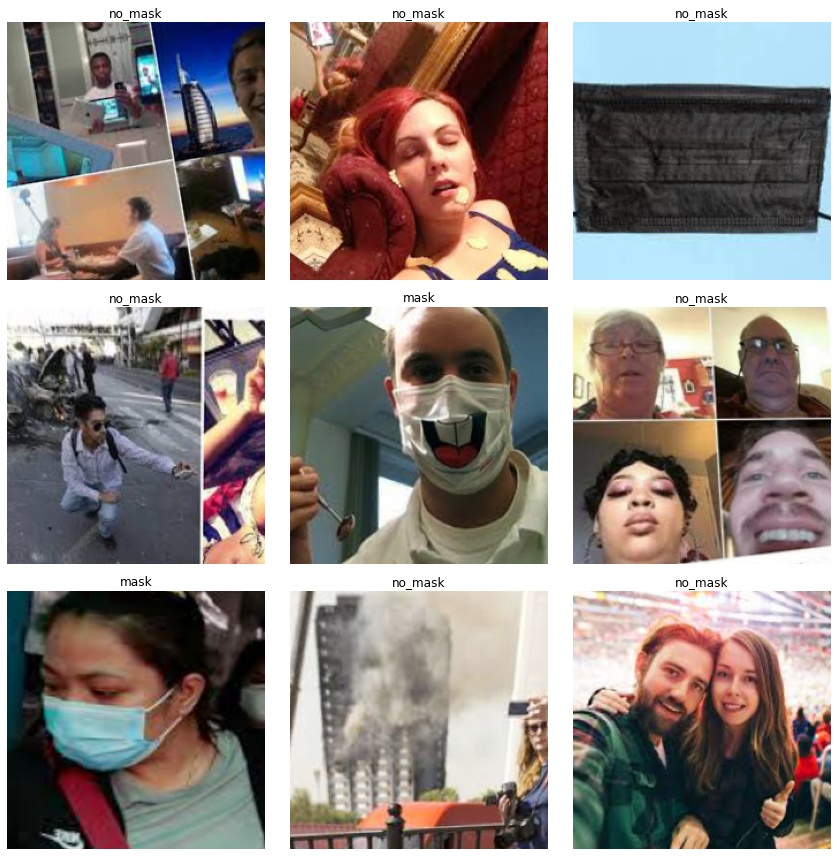

In [14]:
data.show_batch(rows=3)

In [15]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.815683,0.486938,0.179104,00:07


In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


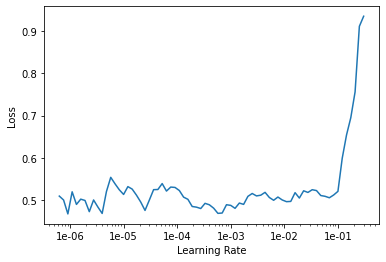

In [18]:
learn.recorder.plot()

In [0]:
learn.save("learn1")

In [20]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.454047,0.307756,0.104478,00:07
1,0.361506,0.225430,0.067164,00:06
2,0.293870,0.173184,0.044776,00:07


In [0]:
learn.save("learn2")

In [23]:
interp = learn.interpret()

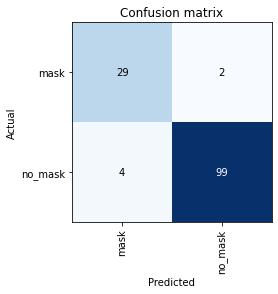

In [24]:
interp.plot_confusion_matrix()

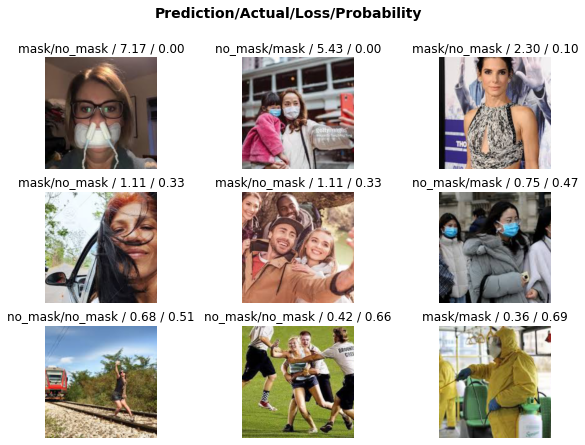

In [25]:
interp.plot_top_losses(9, figsize=(10,7))